# Tutorial 2

In [1]:
from imports import *
import staircase as sc
%matplotlib inline
import operator
import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv(r"../data/vessel_queue.csv", parse_dates=['enter', 'leave'], dayfirst=True)
df.head()

,enter,leave,tonnes
0,NaT,2020-01-01 04:40:00,129000
1,NaT,2020-01-01 22:18:00,69055
2,NaT,2020-01-01 11:47:00,138000
3,NaT,2020-01-02 10:12:00,84600
4,NaT,2020-01-01 22:39:00,142550


In [3]:
#%%timeit -r 10 -n 10

vsteps = Steps.read_dataframe(df,'enter','leave',use_datetime=True)
queue = sc.Stairs(use_dates=True).layer(df.enter, df.leave)

<AxesSubplot:>

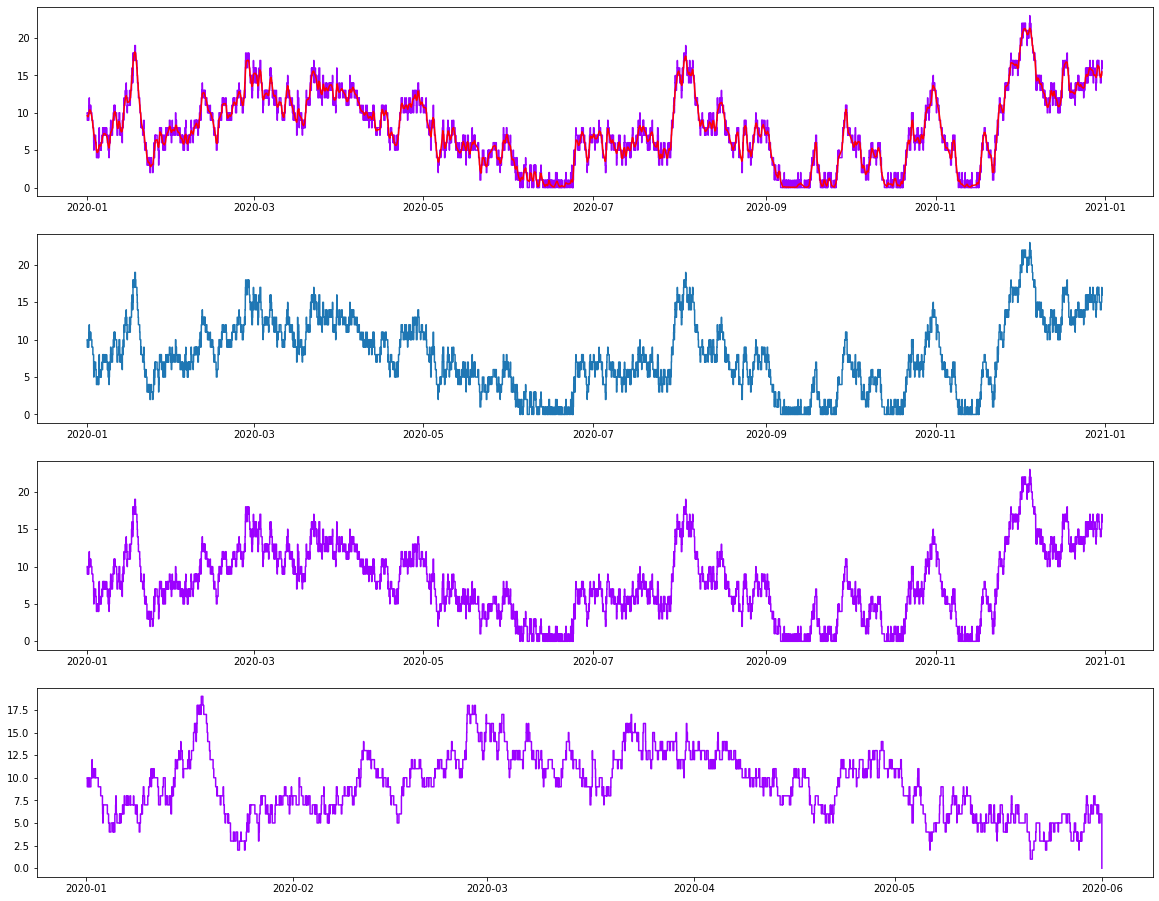

In [4]:
p = np.arange(pd.Timestamp(2020,1,1), pd.Timestamp(2020,12,30), pd.Timedelta(hours=1)).astype(pd.Timestamp)
fig,ax = plt.subplots(nrows=4,figsize=(20,16))

#vsteps.rebase(tbase)
vsteps.plot(ax=ax[0])
#vsteps.smooth_plot(ax=ax[0],color='g',linewidth=5)
vsteps.plot(method='smooth',ax=ax[0],color='r',ts_grain=pd.Timedelta(hours=0.25))

queue.plot(ax[1])

haarst = Steps(True).add_direct([None],[pd.Timestamp(2020,6,1)])

vsteps.plot(ax=ax[2])

(vsteps*haarst).plot(ax=ax[3])
#print(vsteps.mean())
#print(queue.mean())


In [ ]:
fig,ax = plt.subplots(nrows=2,figsize=(20,6))

vstep_clipped = vsteps.clip(lbound=pd.Timestamp(2020,6,1),ubound=pd.Timestamp(2020,7,1))
vstep_clipped2 = vstep_clipped.clip(ubound=pd.Timestamp(2020,6,10))
vstep_clipped3 = vstep_clipped.clip(lbound=pd.Timestamp(2020,6,10))

t = np.arange(pd.Timestamp(2020,1,1),pd.Timestamp(2020,1,10),pd.Timedelta(minutes=10)).astype(pd.Timestamp)

#note that clip will zero out the each end of the new step
vstep_clipped.plot(ax=ax[0])
vstep_clipped2.plot(ax=ax[0],color='g')
vstep_clipped3.plot(ax=ax[0],color='blue')
#vstep_clipped.normalise().plot(ax=ax[0],color='orange',plot_range=(pd.Timestamp(2020,1,1),pd.Timestamp(2020,1,10)))


vstep_clipped2.normalise().plot(ax=ax[0],color='black')
vstep_clipped3.normalise().plot(ax=ax[0],color='grey')
#((vstep_clipped.normalise())*2).plot(ax=ax[0],color='r')
#ax[0].step(t,vstep_clipped.normalise().step(t),color='orange')

In [ ]:
# %%timeit -r 10 -n 10
# p = np.arange(pd.Timestamp(2020,1,1), pd.Timestamp(2020,12,30), pd.Timedelta(hours=1)).astype(pd.Timestamp)
# vsteps.step(p)

In [ ]:
# %%timeit -r 10 -n 10
# p = np.arange(pd.Timestamp(2020,1,1), pd.Timestamp(2020,12,30), pd.Timedelta(hours=1)).astype(pd.Timestamp)
# vsteps.smooth_step(p)

In [ ]:
vsteps